In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm 

In [10]:
class MyRandom:
    
    def __init__(self, seed = 15, method='simple'):
        
        self.r = seed
        self.method = method
        
        if method=='simple':
            self.a = 57
            self.c = 1
            self.M = 265
        elif method == 'drand48':
            self.a = int('5DEECE66D',16)
            self.c = int('B',16)
            self.M = 2**48
        else:
            print('Generador no reconocido')
            
    def Random(self):
        
        r = (self.a*self.r + self.c)%self.M
        self.r = r
        
        return r/float(self.M)
    
    def TestMethod(self, Npoints, moment, seed_ = 32, method_ = 'simple'):
        
        rand = MyRandom(seed = seed_, method = method_)
        
        array = np.zeros(Npoints)
        
        for i in range(Npoints):
            array[i] = rand.Random()
            
        return np.sqrt( Npoints )* np.abs( np.mean( array**moment ) - 1/(1+momento) )

In [11]:
rand = MyRandom(seed = 12, method='drand48')

In [12]:
rand.Random()

0.0010749760087058746

In [16]:
def FillPoints(seed_, method_, Npoints):
    
    rand = MyRandom(seed = seed_, method=method_)
    
    points = np.zeros(Npoints)
    
    for i in tqdm(range( Npoints )):
        points[i] = rand.Random()
        
    return points

In [17]:
Npoints = 5000
NSimple = FillPoints( 64, 'simple', Npoints)
Ndrand48 = FillPoints( 56, 'drand48', Npoints)

100%|███████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 331308.87it/s]


In [19]:
indices = np.arange(Npoints)
Even = (indices%2) == 0
Even

array([ True, False,  True, ..., False,  True, False])

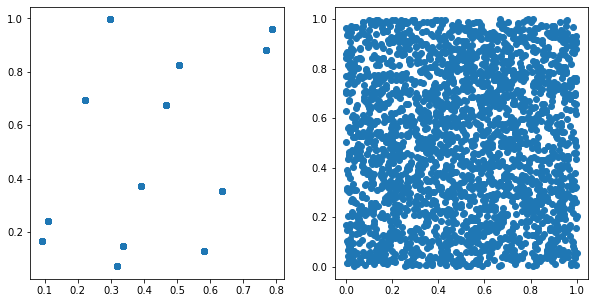

In [25]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

ax.scatter( NSimple[Even], NSimple[~Even] )
ax1.scatter( Ndrand48[Even], Ndrand48[~Even] )